# Домашнее задание 5

## Задача 0.

1. Сгенерируйте NumPy-массив чисел от 0 до 10000 (включительно).
2. Найдите сумму всех чисел, кроме тех, которые делятся на 3 или на 8 (в одну строку).

In [4]:
import numpy as np

arr = np.arange(1e4 + 1, dtype=np.int32)

np.sum(arr[(arr % 3 != 0) & (arr % 8 != 0)])

29163331

## Задача 1. Интерполяция

Уравнение движения маятника $y = A \cos{(\omega t + \varphi)}$

Есть измерянные данные (с шумом). 

Необходимо найти амплитуду, частоту и начальную фазу.

In [2]:
import numpy as np

In [3]:
t_data = np.linspace(0, 10, 30)
y_noisy = np.array(
    [
        4.10465607,
        1.69794745,
        -2.32313143,
        -4.07624211,
        -1.66543449,
        2.1145771,
        3.70880127,
        2.16805654,
        -2.04181849,
        -4.07636456,
        -1.83702696,
        1.95313412,
        4.18439283,
        1.95123149,
        -1.90018249,
        -3.88197156,
        -2.25644626,
        1.58158325,
        4.08242668,
        2.51835565,
        -1.27829727,
        -4.0866171,
        -2.30645672,
        1.08053092,
        4.07574853,
        2.79301888,
        -0.89299698,
        -3.91278811,
        -3.00365192,
        0.792355,
    ]
)

In [40]:
from scipy.interpolate import interp1d
from scipy.optimize import fmin

inter = interp1d(t_data, y_noisy)
fmin_inter = fmin(
    lambda x: -np.abs(inter(x)), 4, ftol=1e-8
)
fmin_inter

Optimization terminated successfully.
         Current function value: -4.184393
         Iterations: 26
         Function evaluations: 52


array([4.13793104])

In [41]:
A = np.abs(inter(fmin_inter[0]))
phi = np.arccos(inter(0) / A)
omega = np.arccos(inter(1) / A) - phi
f_inter = lambda t: A * np.cos(omega * t + phi)
y_inter = f_inter(t_data)

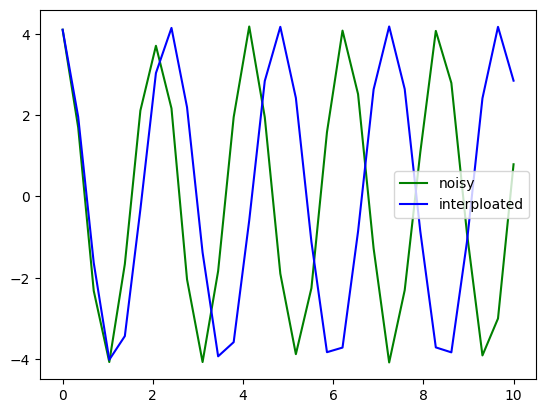

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(t_data, y_noisy, label=r"noisy", color="green")
ax.plot(t_data, y_inter, label=r"interploated", color="blue")
plt.legend()
plt.show()

## Задача 2. Система Лоренца


$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>

В наших вычислениях используем стандартные значения $\sigma=10, \rho=28, \beta=2.667$

<br>

1. Построить хаотический аттрактор. Начальные данные $-$ $(0., 1., 1.05)$, первые 5000 точек решения отбросить ("переходный процесс"). Потом отрисовать траекторию, сформированную 10000 точками. Шаг по времени $\Delta t = 0.01$;
2. Аннотировать график и нанести начальные данные.

In [30]:
from scipy.integrate import odeint

sigma = 10.0
rho = 28.0
beta = 2.667
t_step = 0.01
t_points = 10_000 + 5_000
nd = (0.0, 1.0, 1.05)
time = np.arange(0, t_points * t_step, t_step)
func = lambda y, t: (
    sigma * (y[1] - y[0]),
    y[0] * (rho - y[2]) - y[1],
    y[0] * y[1] - beta * y[2],
)
sol = odeint(func, nd, time)

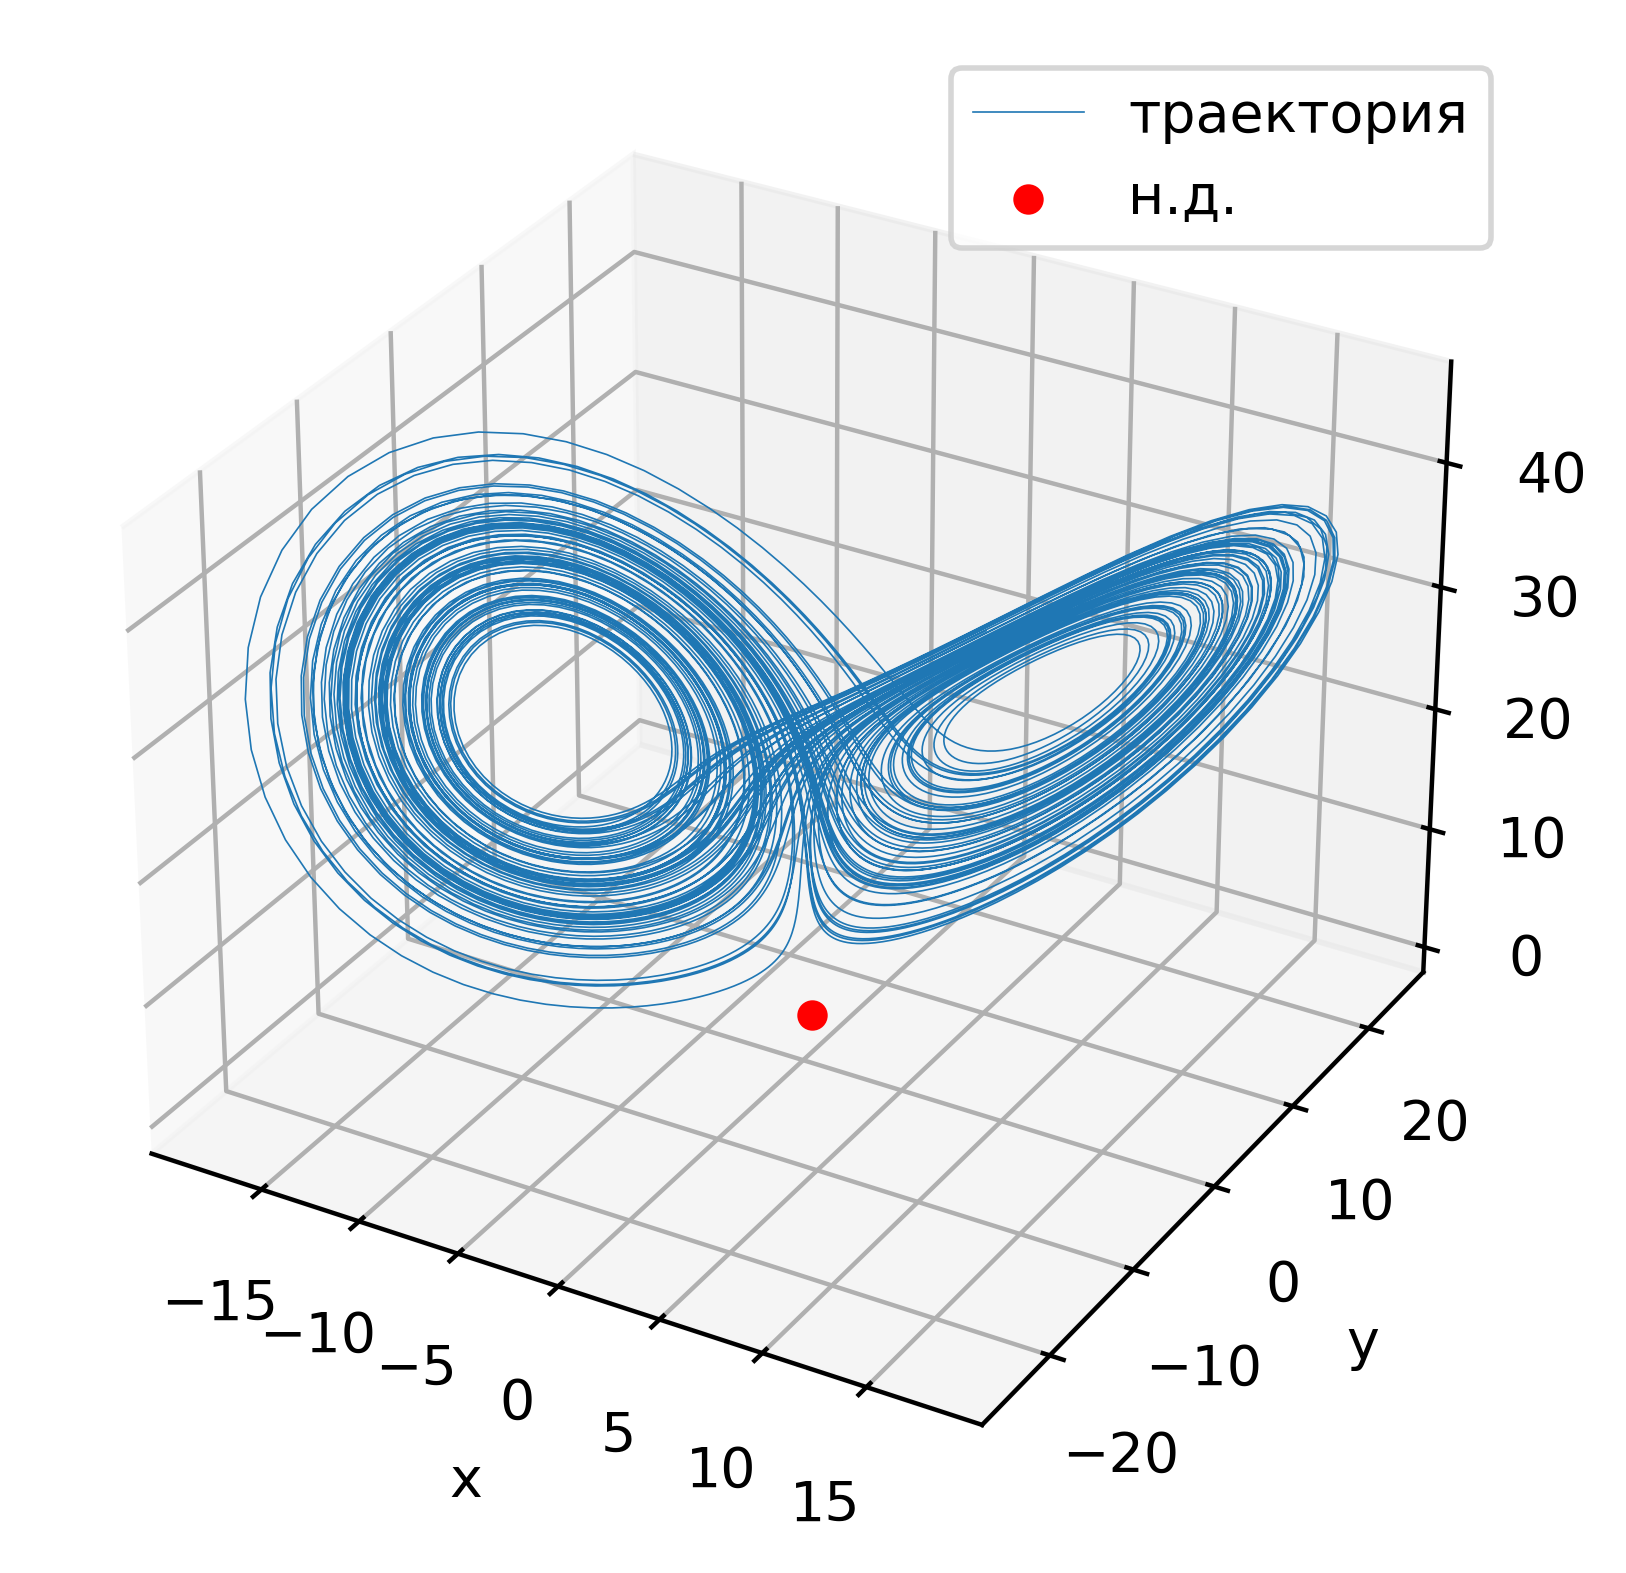

In [33]:
ax = plt.figure(dpi=400).add_subplot(projection="3d")
ax.plot(*sol[5000:].T, linewidth=0.3, label="траектория")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(*nd, color="red", label="н.д.")
plt.legend()
plt.show()

## Задача 3. 

Пусть $y = {\rm e}^{-\frac{x}{10}} \sin{x}$ и рассмотрим $10^4$ равноудаленных точек на интервале $[0, 10]$.

1. Постройте график зависимости $y$ от $x$;
2. Посчитайте среднее и среднеквадратическое отклонение $y$ при значениях $x \in [4, 7]$;
3. Для $x \in [4, 7]$ найдите значение $y_m$ такое, что $70\%$ значений $y$ меньше $y_m$. Обозначьте пунктирной прямой соответствующее значение на графике;
4. Найдите $y'(x)$ и постройте соответствующий график; 
5. Найдите экстремумы $y$ (т.е. решите $y'(x) = 0$). Нанесите найденные точки на график.

In [36]:
x = np.linspace(0, 10, 10_000)
f = lambda x: np.exp(-x / 10) * np.sin(x)

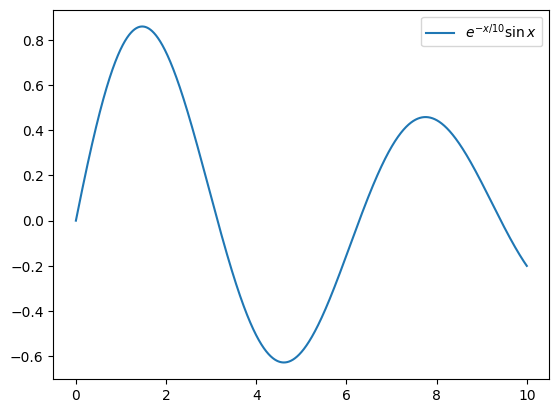

In [40]:
fig, ax = plt.subplots()

ax.plot(x, f(x), label=r"$e^{-x/10} \sin{x}$")
plt.legend()
plt.show()

In [41]:
a, b = 4, 7

mean = f(x[(x >= a) & (x <= b)]).mean()
mean

-0.2956362863932012

In [43]:
std = f(x[(x >= a) & (x <= b)]).std()
std

0.3144532369395424

In [50]:
pers = 70
quantile = np.quantile(f(x[(x >= a) & (x <= b)]), pers / 100)
quantile

-0.09902713505797725

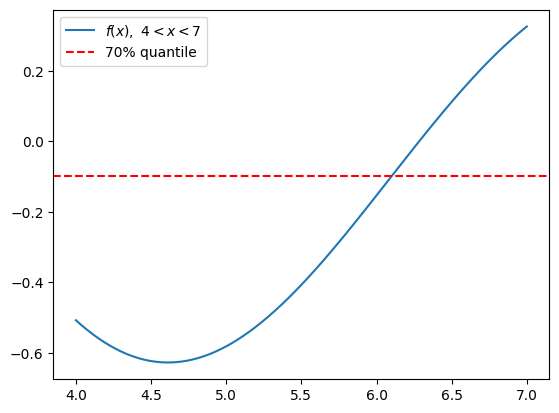

In [53]:
fig, ax = plt.subplots()
ax.plot(x[(x >= a) & (x <= b)], f(x[(x >= a) & (x <= b)]), label=r"$f(x),~4 < x < 7$")
ax.axhline(y=quantile, linestyle="--", color="red", label=r"70% quantile")
plt.legend()
plt.show()

In [54]:
from scipy.optimize import fsolve

dy = lambda x: -x / 10 * f(x) + np.exp(-x / 10) * np.cos(x)
extr = np.array([fsolve(dy, 2)[0], fsolve(dy, 4)[0], fsolve(dy, 8)[0]])
extr

array([1.42887001, 4.30580141, 7.22810977])

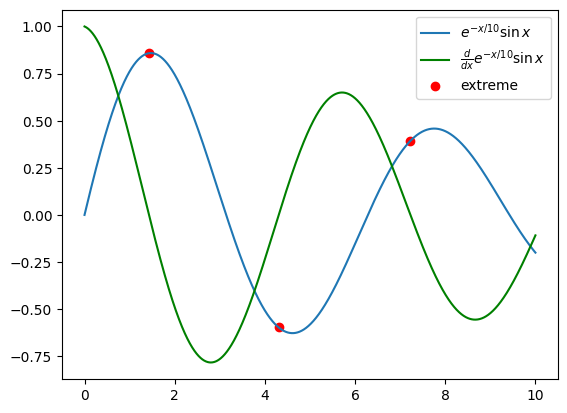

In [56]:
fig, ax = plt.subplots()

ax.plot(x, f(x), label=r"$e^{-x/10} \sin{x}$")
ax.plot(x, dy(x), label=r"$\frac{d}{dx} e^{-x/10} \sin{x}$", color="green")
ax.scatter(extr, f(extr), label=r"extreme", color="red")

plt.legend()
plt.show()

## Задача 4

Постройте <a href="https://en.wikipedia.org/wiki/Rose_(mathematics)">розочку</a>, заданную уравнением

$r(\theta) = 1 + \frac{3}{4}\sin{3\theta}$ при $0 \leq \theta \leq 2 \pi$.

1. Найдите вектора $x$ и $y$ и постройте соответствующий график (добавьте легенды, аннотации и т.п.);
2. Найдите площадь, ограниченную фигурой, из формулы $S = \frac{1}{2} \int_{0}^{2\pi} r^2 d\theta$;
3. Найдите длину кривой из формулы $L = \int_{0}^{2\pi} \sqrt{r^2 + (\frac{dr}{d\theta})^2} d\theta$;

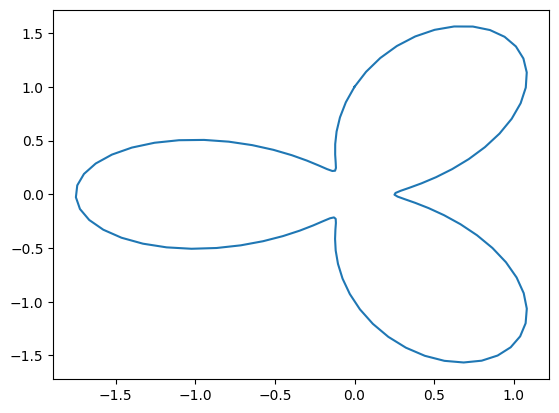

In [58]:
phi = np.linspace(0, 2 * np.pi, 100)
r = 1 + 3 / 4 * np.sin(3 * phi)
x = r * np.sin(phi)
y = r * np.cos(phi)
plt.plot(x, y)
plt.show()

In [62]:
from scipy.integrate import quad

r = lambda phi: (1 + 3 / 4 * np.sin(3 * phi)) ** 2
S, *_ = quad(r, 0, 2 * np.pi)
S

8.050331174823844

In [63]:
dr = lambda phi: (9 / 4 * np.cos(3 * phi)) ** 2
L, *_ = quad(lambda t: np.sqrt(r(t) + dr(t)), 0, 2 * np.pi)
L

11.624988518750428

## Задача 5: Оптимизация

$x_{4}(x_{1} - x_{2} + x_{3}^2) + x_{3}(x_{1} - x_{4}) \rightarrow \inf_{x}$ при ограничениях

$
\begin{align}
x_{1}x_{2}x_{3}x_{4} &\geq 25 \\
x_{1}^2 + x_{2}^2 + x_{3}^2 + x_{4}^2 &= 40 \\
1 \leq x_{1}, x_{2}, x_{3}, x_{4} &\leq 5 \\
x_{0} &= (2, 4, 4, 2)
\end{align}
$

In [64]:
from scipy.optimize import Bounds

f = lambda x: x[3] * (x[0] - x[1] + x[2] ** 2) + x[2] * (x[0] - x[3])
f_jac = lambda x: [
    x[3] + x[2],
    -x[3],
    2 * x[2] * x[3] + x[0] - x[3],
    x[0] - x[1] + x[2] ** 2 - x[2],
]
f_hess = lambda x: [0, 0, 2 * x[3], 0]


bounds = Bounds([1, 1, 1, 1], [5, 5, 5, 5])

In [66]:
from scipy.optimize import NonlinearConstraint

constraint_1_f = lambda x: [x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2]
constraint_1_jac = lambda x: [2 * x[0], 2 * x[1], 2 * x[2], 2 * x[3]]
constraint_1_hess = lambda x, v: v[0] * np.array([2, 2, 2, 2])
constraint_1 = NonlinearConstraint(
    constraint_1_f, 40, 40, jac=constraint_1_jac, hess=constraint_1_hess
)

constraint_2_f = lambda x: [x[0] * x[1] * x[2] * x[3]]
constraint_2_jac = lambda x: [
    x[1] * x[2] * x[3],
    x[0] * x[2] * x[3],
    x[0] * x[1] * x[3],
    x[0] * x[1] * x[2],
]
constraint_2_hess = lambda x, v: v[0] * np.array([0, 0, 0, 0])
constraint_2 = NonlinearConstraint(
    constraint_2_f, 25, np.inf, jac=constraint_2_jac, hess=constraint_2_hess
)

In [67]:
from scipy.optimize import minimize

x_0 = [2, 4, 4, 2]
res = minimize(
    f,
    x_0,
    method="trust-constr",
    jac=f_jac,
    hess=f_hess,
    constraints=[constraint_1, constraint_2],
    options={"verbose": 1},
    bounds=bounds,
)

The maximum number of function evaluations is exceeded.
Number of iterations: 1000, function evaluations: 1052, CG iterations: 1002, optimality: 3.17e-04, constraint violation: 1.57e-06, execution time:  1.7 s.


In [69]:
x = res.x
x

array([1.22679264, 4.55437956, 1.10018964, 4.06720924])

In [70]:
f(x)

-11.735968952120821

In [71]:
constraint_1_f(x)

[40.00000157358096]

In [72]:
constraint_2_f(x)

[25.001407043635695]